In [187]:
import pandas as pd
import numpy as np
wine = pd.read_csv('https://bit.ly/wine_data')

In [168]:
data = wine[['alcohol','sugar','pH']]
target = wine[['class']]

In [195]:
# 부가적인 도구들

import time
# 시간측정하기 위해서

from sklearn.preprocessing import StandardScaler
# 데이터를 (데이터-평균)/표준편차 를 통해 균일화시킨다.

from sklearn.model_selection import cross_validate
# 알아서 테스트 데이터와 결과 데이터를 split 해서 테스트해준다.
# 교차기 - cv = StratifiedKFold 로 default 되있음.
# splitter = StratifiedKFold(n_splits=?, shuffle=?) 지정해주면 원하는 대로 교차할 수 있음

from sklearn.model_selection import GridSearchCV
# 그리드 서치 방식은 규제상수 (alpha, C) 를 하는데 써볼 것.
# params 로 Dictionary 형태로 각각의 하이퍼파라미터를 넣어줄 수 있음.

from sklearn.model_selection import StratifiedKFold
# 교차기 -> 교차검증기에 splitter 로써 넣어줄 것

from sklearn.model_selection import train_test_split
# 훈련데이터와 테스트데이터를 비율별로 나눠준다.

import matplotlib.pyplot as plt
# plot 하는 함수를 불러오고,

In [29]:
# 여기부턴 규제를 주어 overfitting 을 방지하는 기능 
# 계수에 규제를 주어야 하기 때문에 데이터가 균일해야함. 그래서 StandardScaler 를 미리 거쳐주어야 함.

from sklearn.linear_model import LogisticRegression 
# 로지스틱 회귀 (회귀를 이용하여 분류 기준을 만들고, 이를 활용하여 분류)
# 로지스틱 회귀에서 규제를 제어하는 매개변수는 C이다.
# C가 크면 규제강도가 약해지고, C가 작으면 규제강도가 커진다. (C가 크면 규제 완화)

from sklearn.linear_model import Ridge
# 릿지 방식 -> 계수를 제곱한 값을 기준으로 규제를 적용하는 방식
# 변수에 alpha (규제변수)를 곱한다 = 크면 클수록 규제강도가 강해진다. => overfitting 방지, 데이터 일반화에 유리

from sklearn.linear_model import Lasso
lasso = Lasso()
# 라쏘 방식 -> 계수의 값을 기준으로 규제를 적용하는 방식
# 변수에 마찬가지로 alpha 를 곱한다. 크면 클수록 규제강도가 강해짐 => overfitting 방지, 데이터 일반화에 유리


In [25]:
from sklearn.neighbors import KNeighborsClassifier 
# 이웃점을 활용한 분류기 (K-최근접 이웃 분류기)

from sklearn.linear_model import SGDClassifier
# 확률적 경사 하강법 (Stochastic Gradient Descent)
# - 샘플들을 하나하나 넣어보면서 데이터와 예측값 사이의 오차를 줄여 나가면서
# 분류기를 fitting 하는 방식.
# 사용할 때 손실함수의 종류 지정해줘야 함. (loss = 'log' 이런식으로)


In [28]:
# 여기서부턴 트리 방식

# tree 를 plotting 해주는 함수
from sklearn.tree import plot_tree


# 결정트리 분류기 -> 분류가 어떻게 되었는지 더욱 세밀하게 알 수 있음.
from sklearn.tree import DecisionTreeClassifier
# 부모 노드와 자식 노드 간의 불순도(gini) 차이가 커지는 방향으로 점점 분류한다.
# 분류해야 되니 불순도 차이가 커지는 방향으로 해야지.
# Tree 는 max_depth 을 선정할 수 있음. 
# max_depth 가 높을수록 훈련데이터에 overfitting. 실제 상황에 일반화가 더욱 안됨.
# Tree에 feature_names 을 따로 적어두고, plot_tree 할 때 써줘야 함.

# 여기선 트리의 심화버전, 앙상블 분류기
# 앙상블 분류기에선 'permutation_importance()' 함수를 통해 특성중요도를 봐야한다.

# 랜덤포레스트 -> 부트스트랩 샘플(랜덤으로 뽑아 중복된 샘플의 군집을 만드는 방식)을 사용한다
from sklearn.ensemble import RandomForestClassifier

# 엑스트라 트리 분류기 -> 
from sklearn.ensemble import ExtraTreesClassifier

# 그래디언트 부스팅 -> 깊이가 3인 결정 트리 100개를 쓰는 방식 (n_estimator = 100 default)
# Overfitting 방지에 탁월, 일반화에도 좋음.
# 그리고 gradient -> 샘플을 하나하나 받아가면서 손실을 줄이는 방식이기에
# 작동 속도가 느림.
from sklearn.ensemble import GradientBoostingClassifier

# 히스토그램 기반 그래디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# 히스토그램 기반 그래디언트 부스팅의 끝판왕 - XGBoost (가장 좋은 트리분류기) 
from xgboost import XGBClassifier

In [170]:
ss = StandardScaler()

In [171]:
# 스케일링 하려면 일단 스케일기계에 데이터의 특성이 몇개인지 학습을 시켜줘야 함.
ss.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [172]:
# 스케일된 데이터가 필요할 지 모르니 일단 마련해주고.
data_scaled = ss.transform(data)

In [174]:
params = {'C':[0.01,0.1,1,10,20]}

In [175]:
lr = LogisticRegression(random_state=42, n_jobs=-1)

In [176]:
gc = GridSearchCV(lr, param_grid=params, cv=splitter, n_jobs=-1, return_train_score=True)

In [177]:
# cross_validate(lr, data_scaled, target, cv=splitter, return_train_score=True)
gc.fit(data_scaled, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [178]:
gc.cv_results_['mean_test_score']
# GridSearch 를 활용하여 LogisticRegression 으로 와인을 분류했을 때, 정확도 평균 0.98 정도 나옴.

array([0.77897308, 0.78128177, 0.78051216, 0.78051216, 0.78051216])

In [179]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data_scaled,target)

In [85]:
import pandas as pd

In [180]:
ridge = Ridge()
lasso = Lasso()
logisticreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=4)
sgd = SGDClassifier(loss='log')
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
extratree = ExtraTreesClassifier()
gradientboos = GradientBoostingClassifier()
histgrad = HistGradientBoostingClassifier()
xgb = XGBClassifier()

In [193]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_ridge = cross_validate(ridge, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(lasso, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_knn = cross_validate(knn, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_sgd = cross_validate(sgd, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(dectree, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_extratree = cross_validate(extratree, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_gradientboos = cross_validate(gradientboos, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_histgrad = cross_validate(histgrad, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [194]:
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) # 선형회귀에서 쓰이는 거
print('릿지 test data score : ',np.mean(scores_ridge['test_score'])) # 선형회귀에서 쓰이는 거 
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) # 선형회귀에서 쓰이는 거
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) # 선형회귀에서 쓰이는 거
print('K-이웃점 train data score : ',np.mean(scores_knn['train_score']))
print('K-이웃점 test data score : ',np.mean(scores_knn['test_score']))
print('선형회귀 train data score : ',np.mean(scores_logisticreg['train_score']))
print('선형회귀 test data score : ',np.mean(scores_logisticreg['test_score']))
print('SGD (확률적 경사하강법) train data score : ',np.mean(scores_sgd['train_score']))
print('SGD (확률적 경사하강법) test data score : ',np.mean(scores_sgd['test_score']))
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
print('엑스트라트리 train data score : ',np.mean(scores_extratree['train_score']))
print('엑스트라트리 test data score : ',np.mean(scores_extratree['test_score']))
print('gradientboost train data score : ',np.mean(scores_gradientboos['train_score']))
print('gradientboost test data score : ',np.mean(scores_gradientboos['test_score']))
print('히스토그램그래디언트 train data score : ',np.mean(scores_histgrad['train_score']))
print('히스토그램그래디언트 test data score : ',np.mean(scores_histgrad['test_score']))
print('XGB train data score : ',np.mean(scores_xgb['train_score']))
print('XGB test data score : ',np.mean(scores_xgb['test_score']))

릿지 train data score :  0.21285628547834623
릿지 test data score :  0.2119721978413349
라쏘 train data score :  0.0
라쏘 test data score :  -1.4388848481594607e-06
K-이웃점 train data score :  0.9027551542385864
K-이웃점 test data score :  0.8534694878389995
선형회귀 train data score :  0.7794981104697271
선형회귀 test data score :  0.7798967292083048
SGD (확률적 경사하강법) train data score :  0.769124670567273
SGD (확률적 경사하강법) test data score :  0.7700444157707561
결정트리(Decision Tree) train data score :  0.997013988447811
결정트리(Decision Tree) test data score :  0.8699392220213927
랜덤포레스트 train data score :  0.9969832040616516
랜덤포레스트 test data score :  0.8982586139116316
엑스트라트리 train data score :  0.997013988447811
엑스트라트리 test data score :  0.8947172142829105
gradientboost train data score :  0.8820685356512753
gradientboost test data score :  0.8691683321869546
히스토그램그래디언트 train data score :  0.9227950790007508
히스토그램그래디언트 test data score :  0.881019981123155
XGB train data score :  0.8766813931438425
XGB test data sc

In [198]:
# 우선 릿지랑 라쏘는 선형회귀 방법이기에 정확도가 이상하게 나온게 맞음.
# 정확도 순서대로 나열하자면
# 엑스트라 트리 = 랜덤포레스트 = 결정트리 > 히스토그램 > 그래디언트부스트 = XGB > K-이웃점 > 선형회귀 > SGD 
# 순서대로 나옴. 
# 그리고 train 데이터 점수와 test 데이터 점수의 차이는 
# XGB가 가장 낮고, 그다음이 gradientboost, 그 다음이 SGD, 그 다음은 선형회귀, 히스토그램 순서.

# 여기에 어떤 의미가 담겨 있을까?

# 우선 와인 데이터의 경우는 구별하기가 꽤나 어려움.
# 알코올 도수가 높다고 해서 꼭 화이트 와인이 아니고,
# pH가 낮다고 해서 꼭 레드와인이 아님.

# 그 말은 분류를 조금 더 세부적으로 해야 한다는 것.
# 결과적으로 세부적으로 점차 나누어지는 트리의 경우가 정확도가 높을 수 밖에 없음.

# 그리고 선형회귀의 정확도가 KNeighbor 보다 낮은 이유는
# 선형회귀는 어떤 수치를 기준으로 이상 이하로 나누는 경향이 큼.
# 하지만 KNeigh 은 주변의 점을 기준으로 나눔.
# 그 말은 선형회귀는 뭔가 포괄적으로 나누는데 비해,
# KNeigh 은 주변 이웃점에 따라 세부적으로 나눌 수 있다고 볼 수 있기에
# KNeigh 가 수치로 딱딱 나눠지지 않는 데이터에는 더욱 유리하다고 볼 수 있음.

# 이제 train 데이터 점수와 test 데이터 점수의 차이에 대해서 말해보자.

# 위 둘의 점수의 차이가 크다는 것은 train 데이터에는 분류기가 딱 들어 맞지만,
# test 데이터에는 잘 들어 맞지 않는다는 걸 의미함.

# 그 말을 한마디로 표현하면,
# train data 에 overfitting (과대적합) 되었다고 볼 수 있고,
# 훈련데이터에 너무 최적화 되어 있기에 실생활의 사물에 대해서 "일반화"하기 어렵다는 걸 의미함.
# (데이터에만 너무 적합하게 맞춰져 있기에 우물안 개구리라고도 볼 수도 있음.)

# 반면에 둘의 점수의 차이가 작다는 것은 train 데이터와 test 데이터 모두에게
# 그럭저럭 잘 들어맞는 걸 의미함.

# 그 말은 training data 에 과대적합되있지 않고, 
# 훈련데이터 뿐만 아니라 다른 데이터에도 그럭저럭 잘 맞기에 "일반화"하기에 유리하다고 할 수 있다.

# 그래서 XGBoost 가 가장 잘 쓰이는 이유는,
# 훈련데이터와 테스트데이터 사이의 값의 차이가 작기에
# 어떤 사물을 일반화하여 무난무난하게 분류할 수 있기 때문이다.

In [196]:
print('릿지 fitting 시간 : ',np.mean(scores_ridge['fit_time'])) # 선형회귀에서 쓰이는 거
print('라쏘 fitting 시간 : ', np.mean(scores_lasso['fit_time'])) # 선형회귀에서 쓰이는 거
print('K-이웃점 fitting 시간 : ',np.mean(scores_knn['fit_time']))
print('선형회귀 fitting 시간 : ',np.mean(scores_logisticreg['fit_time']))
print('SGD (확률적 경사하강법) fitting 시간 : ',np.mean(scores_sgd['fit_time']))
print('결정트리(Decision Tree) fitting 시간 : ',np.mean(scores_dectree['fit_time']))
print('랜덤포레스트 fitting 시간 : ',np.mean(scores_randomforest['fit_time']))
print('엑스트라트리 fitting 시간 : ',np.mean(scores_extratree['fit_time']))
print('gradientboost fitting 시간 : ',np.mean(scores_gradientboos['fit_time']))
print('히스토그램그래디언트 fitting 시간 : ',np.mean(scores_histgrad['fit_time']))
print('XGB fitting 시간 : ',np.mean(scores_xgb['fit_time']))

릿지 fitting 시간 :  0.00532837708791097
라쏘 fitting 시간 :  0.004998842875162761
K-이웃점 fitting 시간 :  0.008538484573364258
선형회귀 fitting 시간 :  0.042456984519958496
SGD (확률적 경사하강법) fitting 시간 :  0.13262470563252768
결정트리(Decision Tree) fitting 시간 :  0.017663240432739258
랜덤포레스트 fitting 시간 :  0.6904061237970988
엑스트라트리 fitting 시간 :  0.5603816111882528
gradientboost fitting 시간 :  0.6199745734532675
히스토그램그래디언트 fitting 시간 :  0.567636251449585
XGB fitting 시간 :  0.301337997118632


In [199]:
# fitting 시간을 살펴보자.
# 랜덤포레스트 > gradientboost > 히스토그램 = 엑스트라트리 > XGB > SGD > 선형회귀 > K-이웃점 

# 랜덤포레스트는 부트스트랩(샘플을 뽑음) 때문에 시간이 소비되고,
# 또 여러 트리를 만들기에 시간이 오래걸림.

# gradientboost 의 경우는 하나하나 샘플을 꺼내어 오차를 줄이는 식이기 때문에
# 하나하나 순서대로 해야 되기 때문에 동시다발적으로 여러 계산을 수행할 수가 없음.
# 그래서 시간이 오래 걸림.

# 그 다음 히스토그램, 엑스트라트리의 경우도 마찬가지로 여러 트리를 만들기에 시간이 좀 걸림.
# 다만 무언갈 뽑아내야 되는 건 없기 때문에 gradientboost 보단 적게 걸리는 것.

# XGB은 트리들 중에서 작업시간이 매우 짧음.
# XGB도 히스토그램 기반인데,
# 다만 일반화에 초점이 맞춰져 있어 분류를 세부적으로 들어가지 않기 때문에
# 시간이 덜 걸린다.

# SGD, 선형회귀, K-이웃점의 경우는 트리와는 달리 매우 단순한 알고리즘 이기 때문에 당연히 시간이 엄청 짧게 소모됨.

# 아무튼 분류가 어려운 데이터에 대해선 앙상블 학습 알고리즘이 좋음.
# 다만 시간이 조금 더 걸린다는 단점이 있긴 하다.

In [197]:
scores_sgd_scaled = cross_validate(sgd, data_scaled, target, cv=splitter, n_jobs=-1, return_train_score=True)
print('SGD (확률적 경사하강법) train data score : ',np.mean(scores_sgd_scaled['train_score']))
print('SGD (확률적 경사하강법) test data score : ',np.mean(scores_sgd_scaled['test_score']))

SGD (확률적 경사하강법) train data score :  0.777681831686326
SGD (확률적 경사하강법) test data score :  0.774202385036431


[Text(279.0, 317.09999999999997, 'X[1] <= -0.272\ngini = 0.372\nsamples = 4872\nvalue = [1204, 3668]'),
 Text(139.5, 190.26, 'X[1] <= -0.803\ngini = 0.485\nsamples = 2697\nvalue = [1116, 1581]'),
 Text(69.75, 63.420000000000016, '\n  (...)  \n'),
 Text(209.25, 63.420000000000016, '\n  (...)  \n'),
 Text(418.5, 190.26, 'X[1] <= 0.17\ngini = 0.078\nsamples = 2175\nvalue = [88, 2087]'),
 Text(348.75, 63.420000000000016, '\n  (...)  \n'),
 Text(488.25, 63.420000000000016, '\n  (...)  \n')]

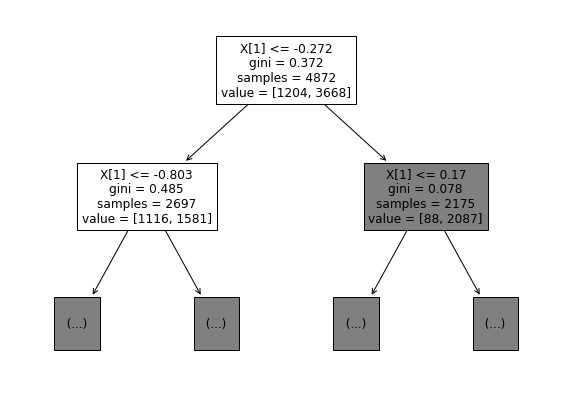

In [211]:
dectree.fit(X_train_lr,y_train_lr)
plt.figure(figsize=(10,7))

plot_tree(dectree, max_depth=1)

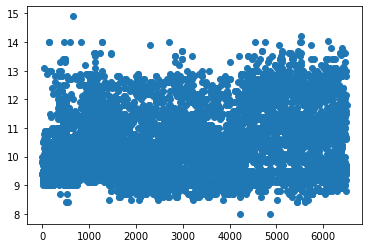

In [225]:
plt.scatter(data.index,data['alcohol'])

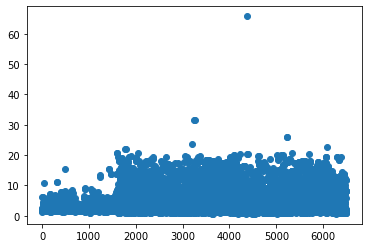

In [223]:
plt.scatter(data.index,data['sugar'])


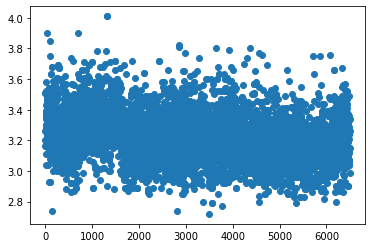

In [224]:
plt.scatter(data.index,data['pH'])